<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-2-Applied-Modeling/blob/master/module1/Vera_Mendes_Assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas_profiling
from sklearn.feature_selection import f_regression, SelectKBest
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from ipywidgets import interact
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import warnings
import pandas as pd
import plotly.express as px

In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/VeraMendes/Project---Train-a-predictive-model/master/led.csv')
print(df.shape)
df.head(50)

(2938, 22)


,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [6]:
df['Year'].value_counts()

2013    193
2015    183
2011    183
2009    183
2007    183
2005    183
2003    183
2001    183
2014    183
2012    183
2010    183
2008    183
2006    183
2004    183
2002    183
2000    183
Name: Year, dtype: int64

In [7]:
df.dtypes

Country                          object
Year                              int64
Status                           object
Lifeexpectancy                  float64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

### Looking into Time Series I am:

### using 2014 & 2015 as test

### using 2012 & 2013 as val

In [0]:
train = df[df['Year']<2012]
val = df[(df.Year == 2012) | (df.Year == 2013)]
test = df[(df.Year == 2014) | (df.Year == 2015)]

In [9]:
train.shape, val.shape, test.shape

((2196, 22), (376, 22), (366, 22))

In [0]:
train.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2196.000000,2196.000000,2196.000000,2196.000000,2183.000000,2196.000000,1686.000000,2196.000000,2172.000000,2196.000000,2177.000000,2157.000000,2177.000000,2196.000000,1867.000000,1.716000e+03,2172.000000,2172.000000,2076.000000,2076.000000
mean,2005.500000,68.524362,169.802823,32.211749,4.810087,746.187750,80.154804,2727.711293,37.248020,45.051002,82.009646,5.849240,81.336702,2.076184,7001.250948,1.225507e+07,4.944107,4.972376,0.607871,11.719123
std,3.452839,9.770672,129.830557,126.211282,3.986236,1939.312121,25.475194,12488.406676,19.586701,172.592047,23.508044,2.417635,24.359650,5.762757,13647.537618,6.076693e+07,4.499999,4.612262,0.223548,3.440282
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2002.750000,62.100000,75.000000,0.000000,1.290000,9.842878,76.000000,0.000000,18.500000,0.000000,77.000000,4.240000,77.000000,0.100000,417.438073,1.773290e+05,1.600000,1.600000,0.472250,9.800000
50%,2005.500000,71.800000,146.000000,3.000000,3.970000,71.015100,92.000000,19.000000,42.600000,4.000000,92.000000,5.670000,92.000000,0.100000,1524.412220,1.332892e+06,3.300000,3.400000,0.663000,12.100000
75%,2008.250000,75.200000,233.250000,24.000000,7.820000,438.989617,96.000000,444.250000,55.200000,31.000000,97.000000,7.410000,97.000000,1.000000,5336.594060,7.018928e+06,7.400000,7.400000,0.769000,14.000000
max,2011.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,75.700000,2500.000000,99.000000,17.600000,99.000000,50.600000,115761.577000,1.179681e+09,27.700000,28.600000,0.939000,20.700000


In [0]:
train.describe(exclude='number')

,Country,Status
count,2196,2196
unique,183,2
top,EquatorialGuinea,Developing
freq,12,1812


In [18]:
pandas_profiling.ProfileReport(train)

Number of variables,23
Number of observations,2196
Total Missing (%),2.7%
Total size in memory,394.7 KiB
Average record size in memory,184.0 B
Numeric,18
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [0]:
# choosing my target
target = 'Lifeexpectancy'
train[target].mean()

68.52436247723146

In [0]:
train[target].describe()

count    2196.000000
mean       68.524362
std         9.770672
min        36.300000
25%        62.100000
50%        71.800000
75%        75.200000
max        89.000000
Name: Lifeexpectancy, dtype: float64

In [10]:
train.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

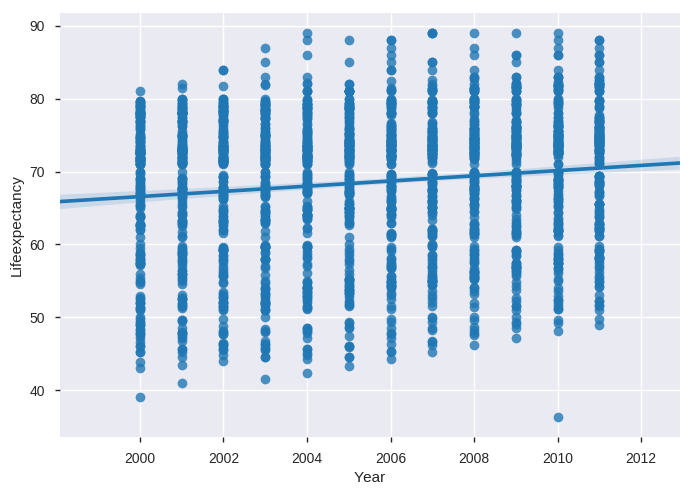

In [24]:
sns.regplot(x=train['Year'],y=train['Lifeexpectancy']);

## No NANs in year, Life expectancy increases slowly as years pass.

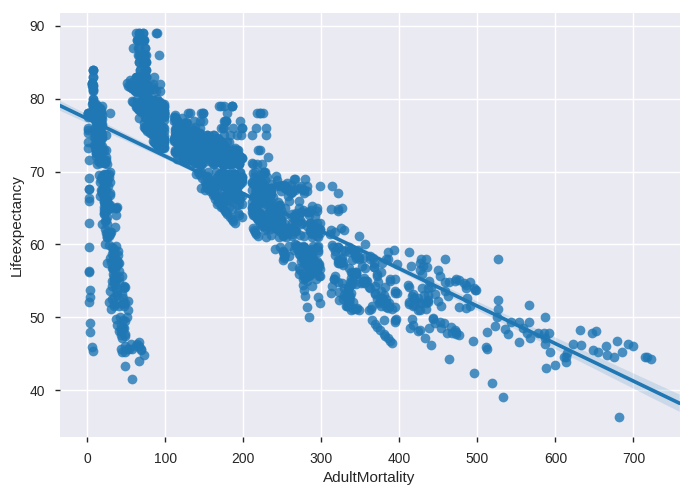

In [25]:
sns.regplot(x=train['AdultMortality'],y=train['Lifeexpectancy']);

## Adult Mortality has NAN's that better would be filled by median between same country prior and after value, if year next or prior to it is not directly before or after, fill just looking into the directly before or directly after. Life expectancy decreases quite a lot with increase of Adult mortality.

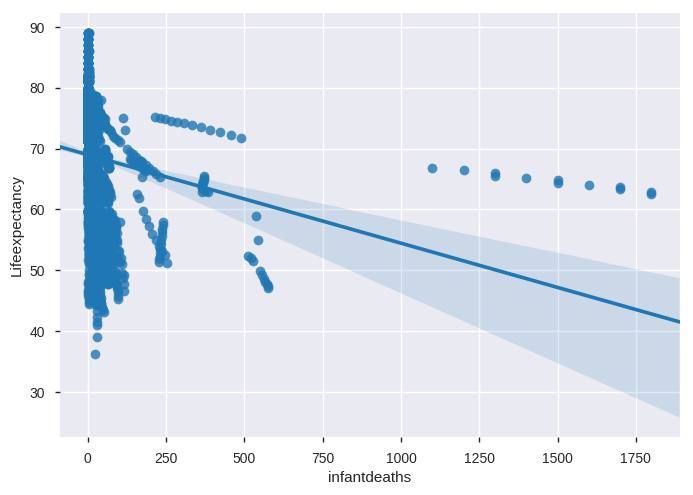

In [30]:
sns.regplot(x=train['infantdeaths'],y=train['Lifeexpectancy']);

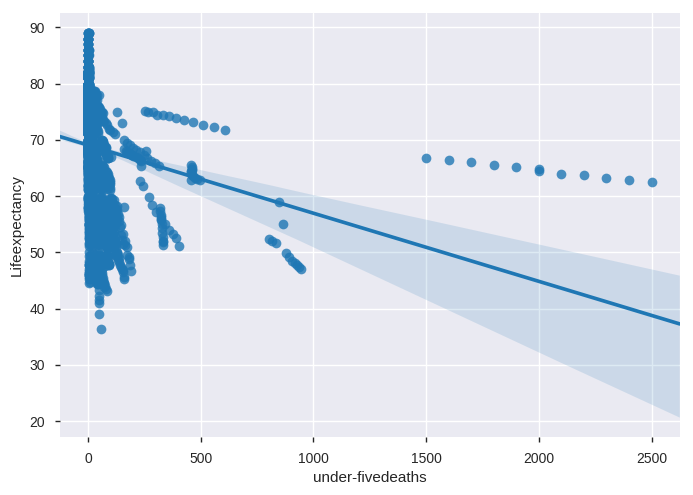

In [37]:
sns.regplot(x=train['under-fivedeaths'],y=train['Lifeexpectancy']);

## Values of infants death and under five deaths are extremely correlated. No NAN's in these columns.

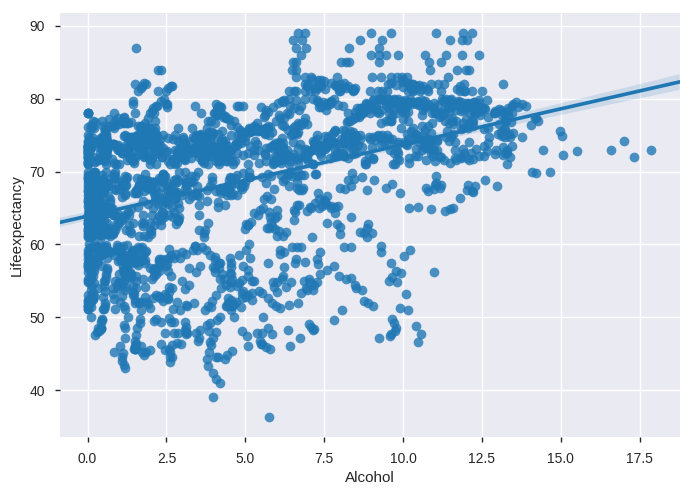

In [31]:
sns.regplot(x=train['Alcohol'],y=train['Lifeexpectancy']);

## Values of Alcohol have NAN's, better to fill with mean of the country. With increases of alcohol consumption, seems there is an increase of life expectancy, which does not seem to make sense. 

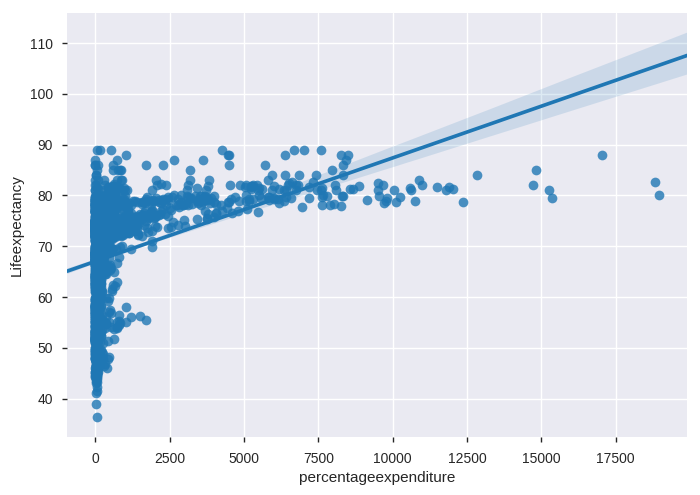

In [32]:
sns.regplot(x=train['percentageexpenditure'],y=train['Lifeexpectancy']);

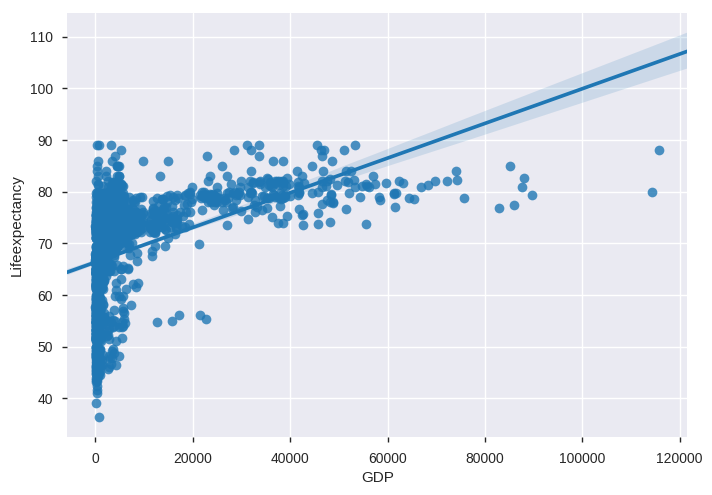

In [39]:
sns.regplot(x=train['GDP'],y=train['Lifeexpectancy']);

## Percentage expenditure are extremely correlated. It is possible to fill GDP NAN values with Percentage expenditure values or drop the GDP column. With increase of these factors, there is an increase of life expectancy. 

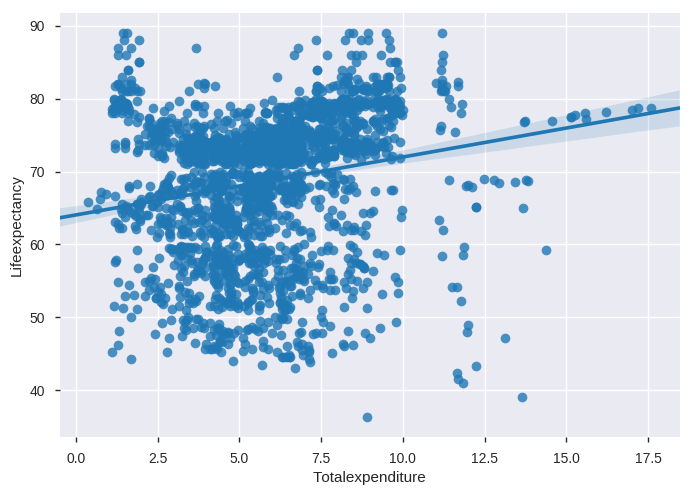

In [49]:
sns.regplot(x=train['Totalexpenditure'],y=train['Lifeexpectancy']);

## 

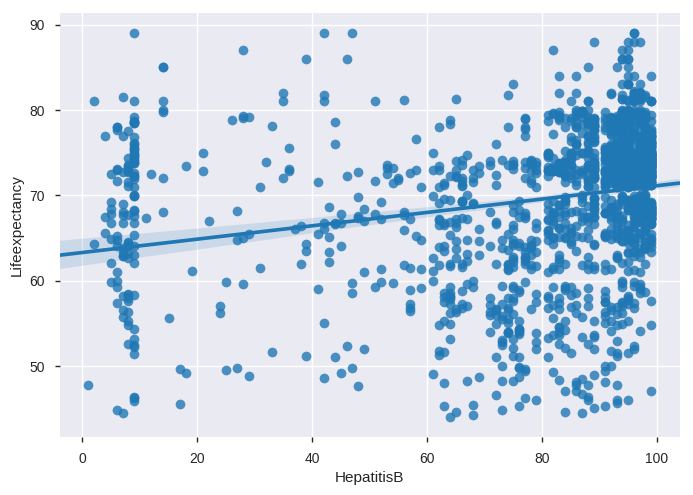

In [34]:
sns.regplot(x=train['HepatitisB'],y=train['Lifeexpectancy']);

## Hepatitis B have NAN's that better would be filled by median between same country prior and after value, if year next or prior to it is not directly before or after, fill just looking into the directly before or directly after. With increase of immunization, there is an increase of life expectancy.

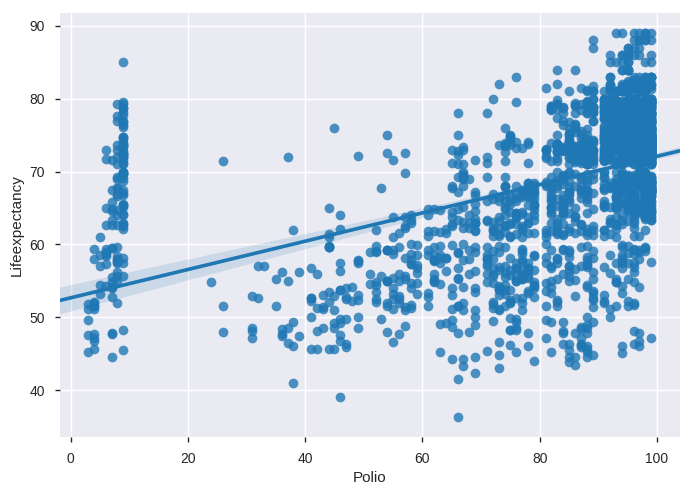

In [38]:
sns.regplot(x=train['Polio'],y=train['Lifeexpectancy']);

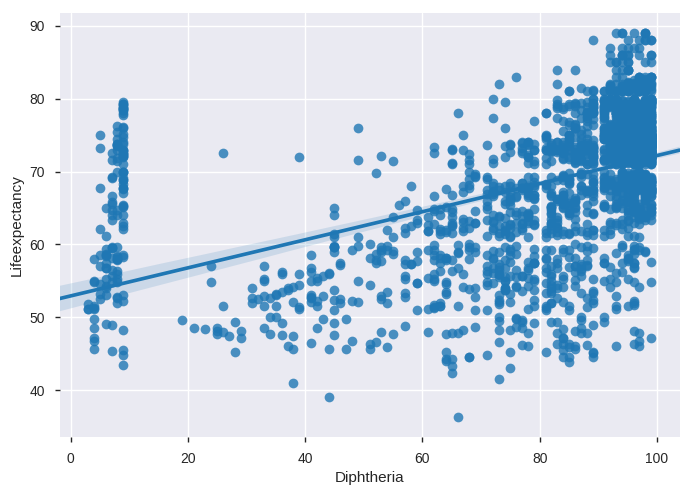

In [41]:
sns.regplot(x=train['Diphtheria'],y=train['Lifeexpectancy']);

## Diphtheria and Polio are very correlated. I might be able to use one column to fill the other's NAN's. Increase of immunization coverage, increases life expectancy.  
## to check if Nan are on the same rows. 

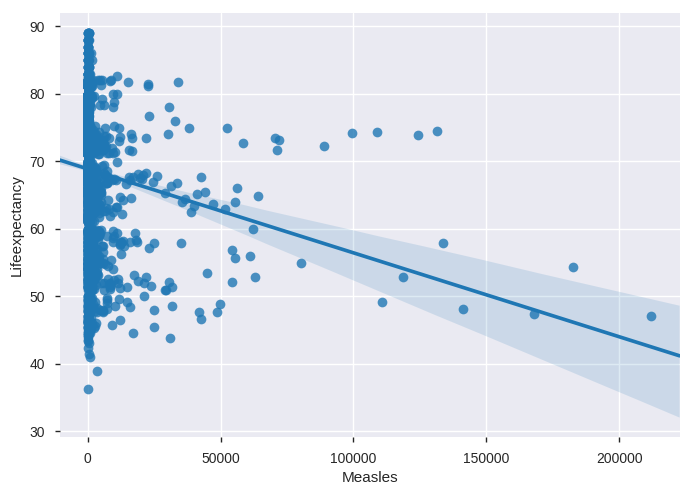

In [35]:
sns.regplot(x=train['Measles'],y=train['Lifeexpectancy']);

## No NAN's. With Measles immunization, decrease of life expectancy, which seems suspicious, but at the same time immunization programs have changed. 

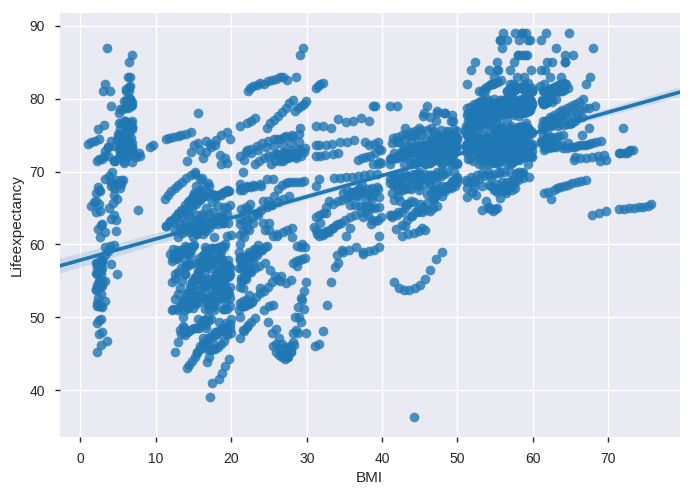

In [36]:
sns.regplot(x=train['BMI'],y=train['Lifeexpectancy']);

## BMI increases, life expectancy increases. Considering the countries where people die for not having anything to eat, this might make sense in the bigger picture. BMI might be able to be filled in with median between same country prior and after value, if year next or prior to it is not directly before or after, fill just looking into the directly before or directly after. maybe even correlated with the thinness but in the way around. 

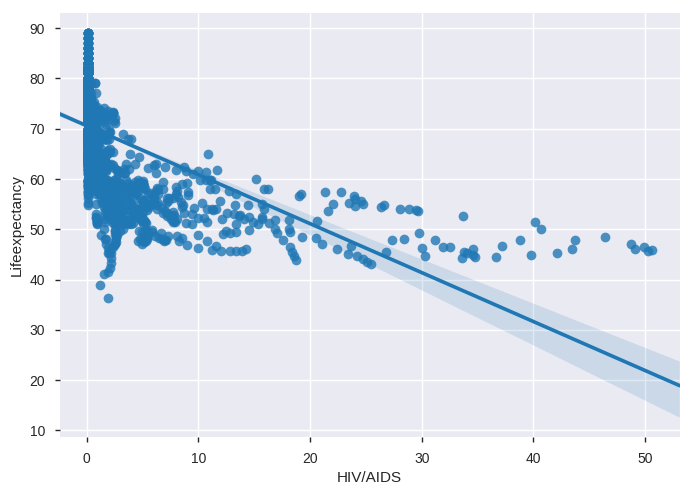

In [42]:
sns.regplot(x=train['HIV/AIDS'],y=train['Lifeexpectancy']);

## When HIV/AIDS live births increases, life expectancy decreases. No NAN's in this column.  

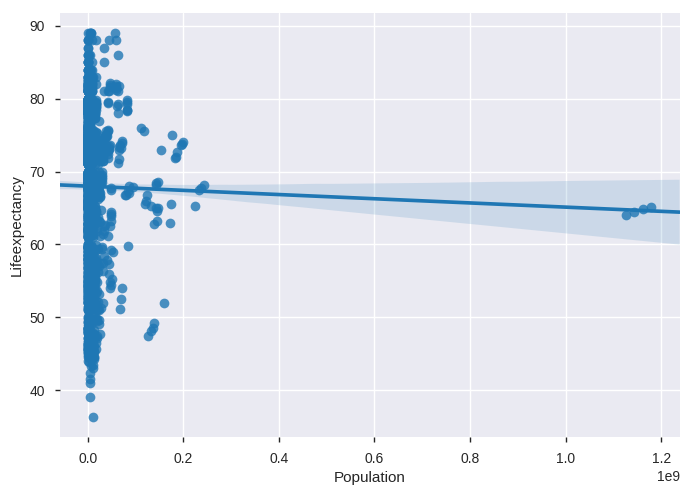

In [43]:
sns.regplot(x=train['Population'],y=train['Lifeexpectancy']);

## To fill in population NAN's we need to consider the size of the country, still it does not seem to be a factor much correlated with the life expectancy as per the plot. Considering to find values for acceptable replace or dropping this column.

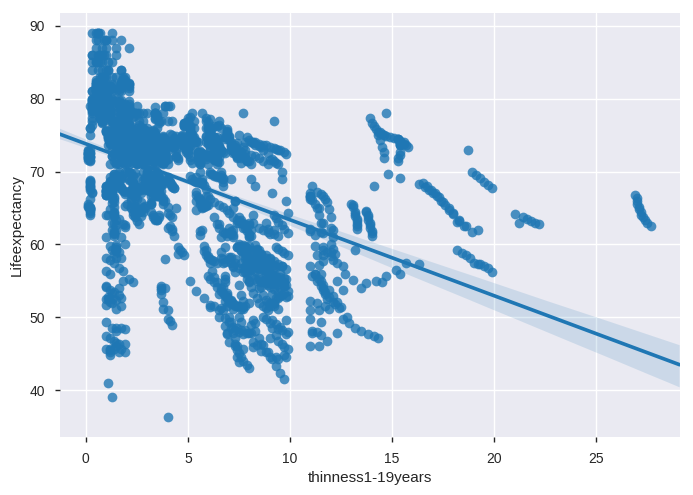

In [44]:
sns.regplot(x=train['thinness1-19years'],y=train['Lifeexpectancy']);

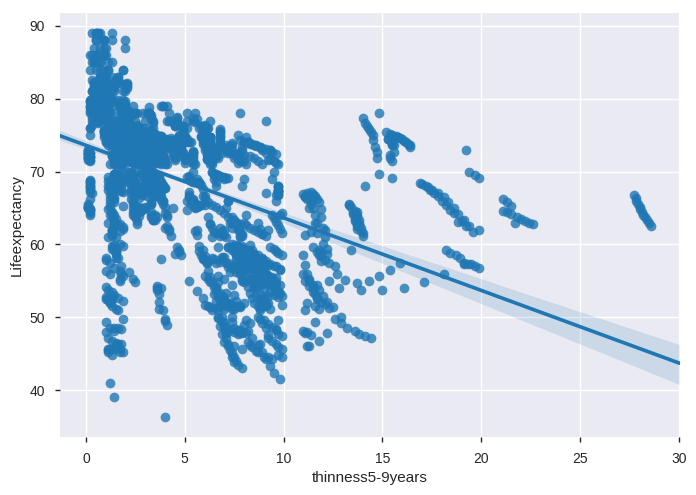

In [45]:
sns.regplot(x=train['thinness5-9years'],y=train['Lifeexpectancy']);

## thinness1-19years and thinness5-9years are very correlated. I might be able to use one column to fill the other's NAN's. Increase of thinness, decreases life expectancy.
## to check if Nan are on the same rows.

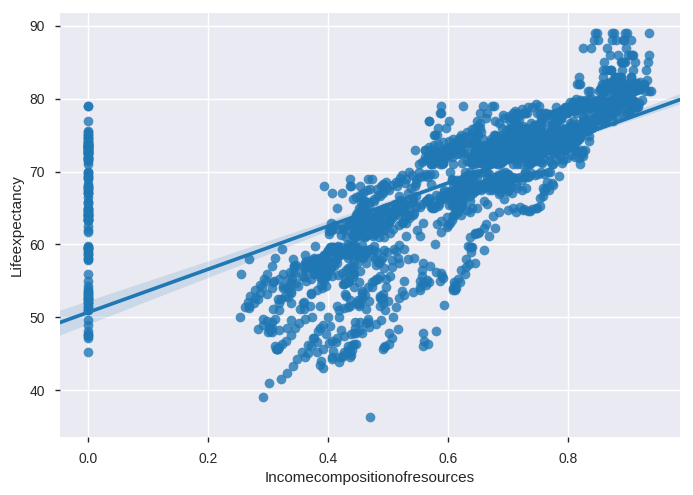

In [46]:
sns.regplot(x=train['Incomecompositionofresources'],y=train['Lifeexpectancy']);

## Mean of each country might be ideal to fillna for this column. As income composition of resources increases, the life expectancy increases as well. 

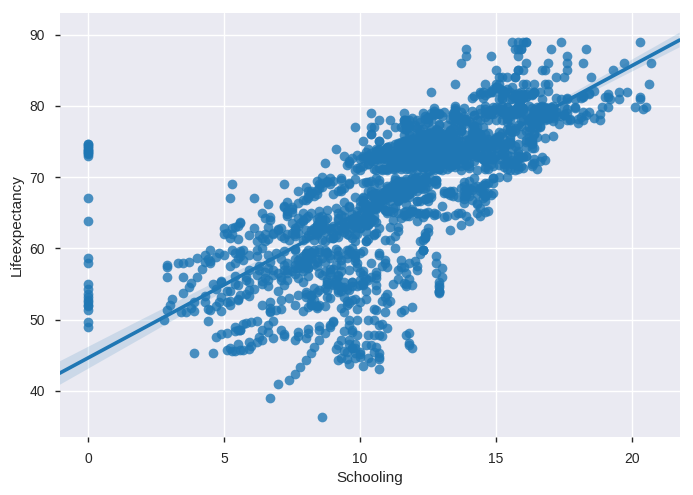

In [47]:
sns.regplot(x=train['Schooling'],y=train['Lifeexpectancy']);

## Schooling has NAN's that better would be filled by median between same country prior and after value, if year next or prior to it is not directly before or after, fill just looking into the directly before or directly after. When number of schooling years increases, life expectancy increases too. 

In [0]:
train.sort_values('GDP', ascending=False)

## There are NAN values in Life expectancy that I am trying to find the best solution to sort. Either filling with the median between same country prior and after value, if year prior or next to it is not directly before or after, fill just looking into the directly before or directly after. Still it can affect my model to fillna on target column as I do not have the correct values for it. 

## I will be solving a regression problem. 

## For my baseline I am thinking to use a linear regression looking into the mean absolut error and the R2 score, so then I can try other different models to make improvements in relation to the baseline. 